In [14]:
import pandas as pd

In [15]:
#Data
data = pd.read_csv("file://localhost/users/nicki/desktop/udvikling/python/data/melb_data.csv",parse_dates=True)

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [17]:
#Setting up whatever model and cleaning in a pipeline 
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),('model', 
RandomForestRegressor(n_estimators=50,random_state=0)) ])

Simple Validation
-

Cross validation
-

In [18]:
from sklearn.model_selection import cross_val_score


In [19]:
# Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).
# So, given these tradeoffs, when should you use each approach?
#     For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
#     For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

# There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.
# Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

#We obtain the cross-validation scores with the cross_val_score() function from scikit-learn. We set the number of folds with the cv parameter.

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


In [20]:
#We typically want a single measure of model quality to compare alternative models. So we take the average across experiments.
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405


Crossvalidation for optimization
-

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
#Function for testing a Randomforest model
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.

    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


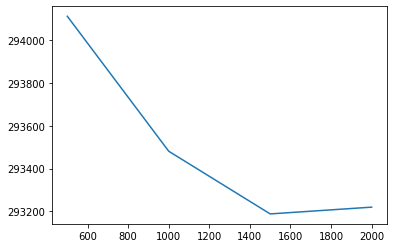

In [31]:
#Testing for for specific model parameter
results = {}
for i in range(1,5):
    results[500*i] = get_score(150*i)

plt.plot(list(results.keys()), list(results.values()))
plt.show()